In [76]:
from google.colab import files
uploaded = files.upload()

Saving stud.csv to stud (2).csv


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df = pd.read_csv('stud.csv')

In [186]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


In [187]:
df.shape

(1000, 8)



**Dataset information**

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score
reading score
writing score



In [188]:
#check missing value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [189]:
df.duplicated().sum() #no duplicate value

0

In [190]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [191]:
# Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [192]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

**INSIGHTS**

*   From above description of numerical data, all means are very close to each other - between 66 and 68.05;
*   All standard deviations are also close - between 14.6 and 15.19;
*   While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17





In [193]:
# seperating numerical and categorical column

numerical_col = df.select_dtypes(include = [np.number])
categorical_col = df.select_dtypes(include = ['object','category'])

**Adding columns for "Total Score" and "Average"**

In [194]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [195]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [196]:
#counting how much students gets full marks
math_full = df[df['math_score']== 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()

In [197]:
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [198]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Visualize average score distribution to make some conclusion**

*   Histogram
*   KDE



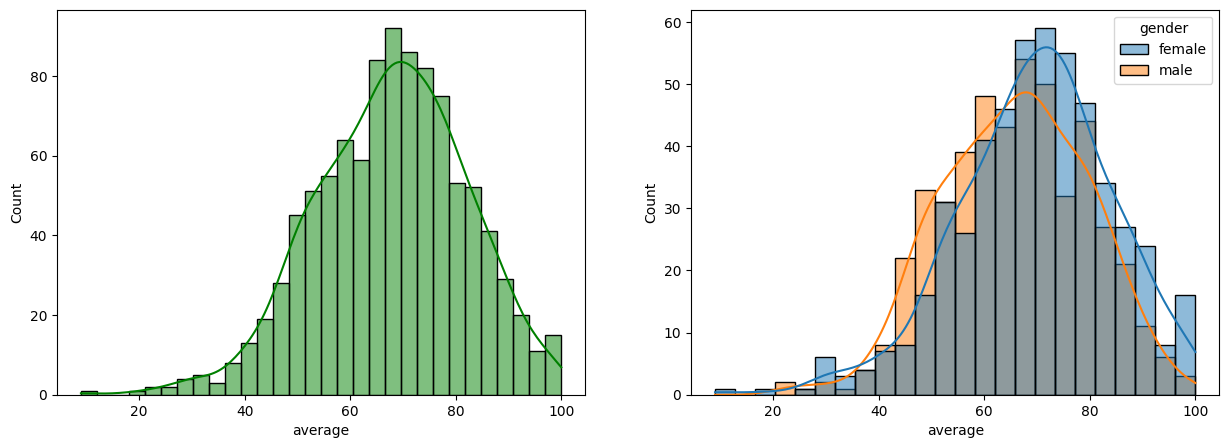

In [199]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df,x=df['average'],bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x= df['average'], kde=True,hue='gender')
plt.show()

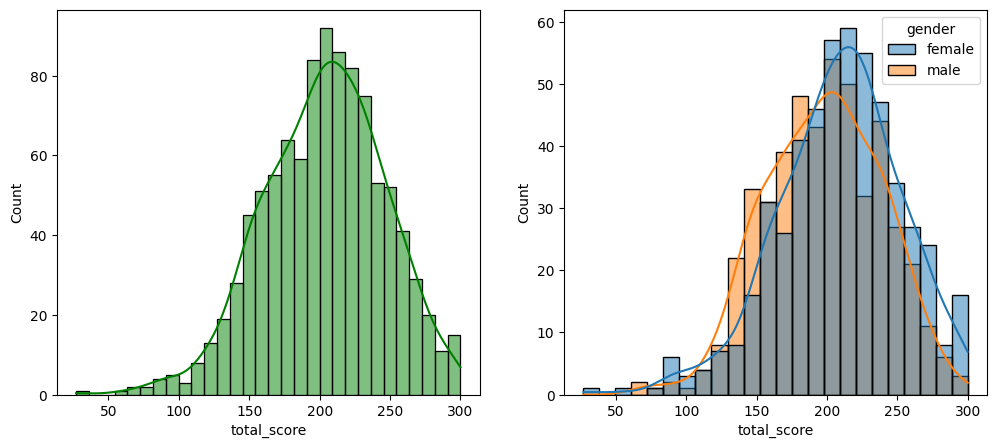

In [200]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x=df['total_score'],bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x= df['total_score'], kde=True,hue='gender')
plt.show()

**Female students tend to perform well then male students.**

<ipython-input-201-abd182186643>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-201-abd182186643>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-201-abd182186643>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


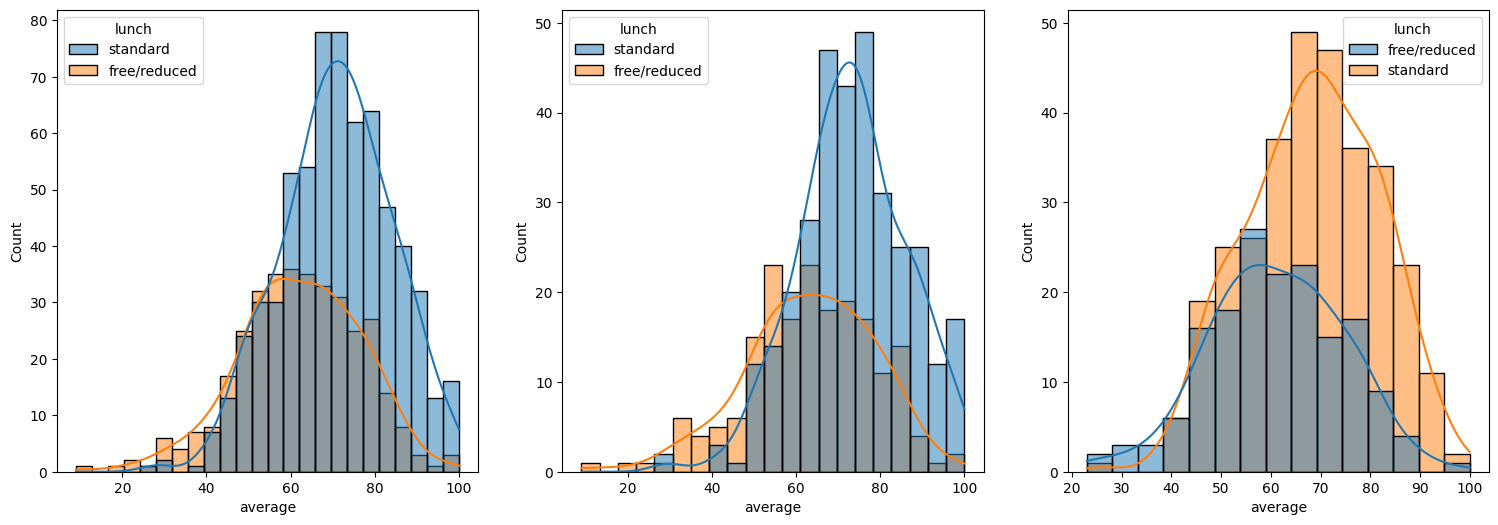

In [201]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights**

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

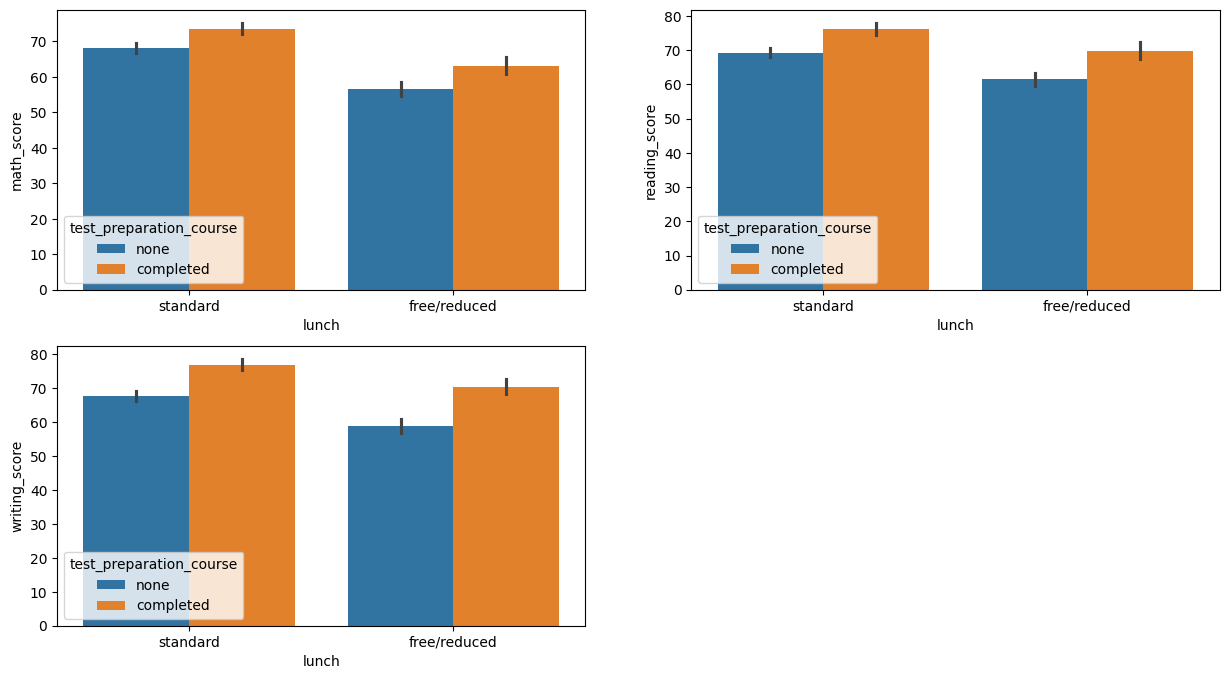

In [202]:
#Test preparation has impact on student performance?
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

**Insights**

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

 **Conclusions**

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.

In [203]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

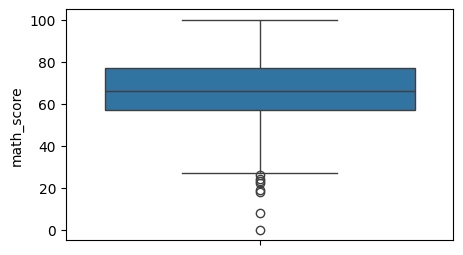

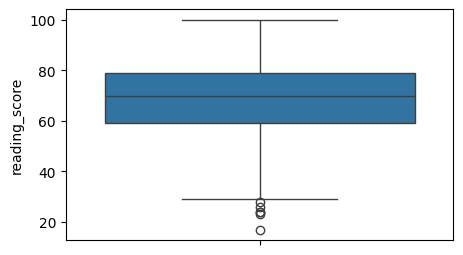

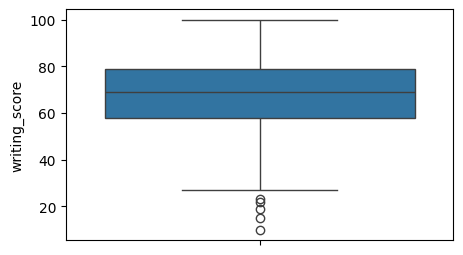

In [204]:
#checking for outliers
for col in numerical_col:
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.show()

In [205]:
#removing outliers
for col in numerical_col:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))

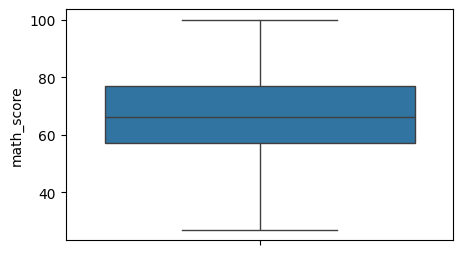

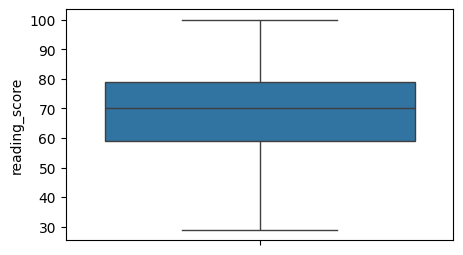

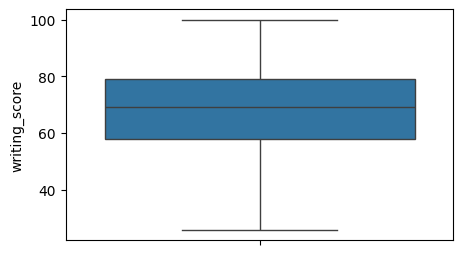

In [206]:
#checking for outliers
for col in numerical_col:
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.show()

In [207]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(drop='first',sparse=False)
encoded =oe.fit_transform(X[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [208]:
encoded_df = pd.DataFrame(encoded,columns=oe.get_feature_names_out())

In [209]:
encoded_df.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [210]:
# Drop the original columns from the dataframe
X = X.drop(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], axis=1)

In [211]:
X = pd.concat([X,encoded_df],axis=1)

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [213]:
X_train.shape,X_test.shape

((800, 16), (200, 16))

In [214]:
X_train.head(1)

,reading_score,writing_score,total_score,average,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
29,70,75,207,69.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['reading_score','writing_score','total_score','average']])
X_test_scaled = scaler.transform(X_test[['reading_score','writing_score','total_score','average']])

In [216]:
X_train = X_train.drop(['reading_score','writing_score','total_score','average'],axis=1)
X_test = X_test.drop(['reading_score','writing_score','total_score','average'],axis=1)


In [217]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=['reading_score','writing_score','total_score','average'])
X_test_scaled = pd.DataFrame(X_test_scaled,columns=['reading_score','writing_score','total_score','average'])

In [218]:
X_train = pd.concat([X_train.reset_index(drop=True),X_train_scaled.reset_index(drop=True)],axis=1)
X_test = pd.concat([X_test.reset_index(drop=True),X_test_scaled.reset_index(drop=True)],axis=1)

In [219]:
X_train.shape,X_test.shape

((800, 16), (200, 16))

In [233]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [221]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


R2 Score: 1.0
Mean Absolute Error: 6.128431095930864e-14
Mean Squared Error: 6.021848606095116e-27
Root Mean Squared Error: 7.760057091346117e-14


In [222]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [223]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R2 Score: 0.9372889769966434
Mean Absolute Error: 3.07
Mean Squared Error: 15.26
Root Mean Squared Error: 3.906404996924922


In [234]:
confusion_matrix = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
confusion_matrix

,Actual,Predicted
521,91,91.0
737,53,53.0
740,80,80.0
660,74,74.0
411,84,84.0
...,...,...
408,52,52.0
332,62,62.0
208,74,74.0
613,65,65.0
